# 2D Convolution 卷积图像过滤   cv2.filter2D()
* LPF(low-pass filters):低通滤波器，消除噪声或模糊图像；
* HPF(high-pass filters):高通滤波器，查找图像边缘；
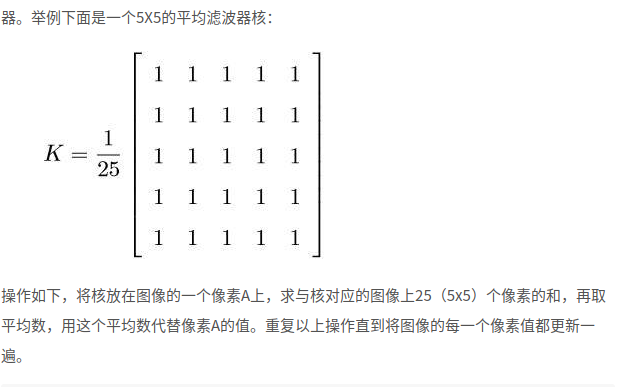
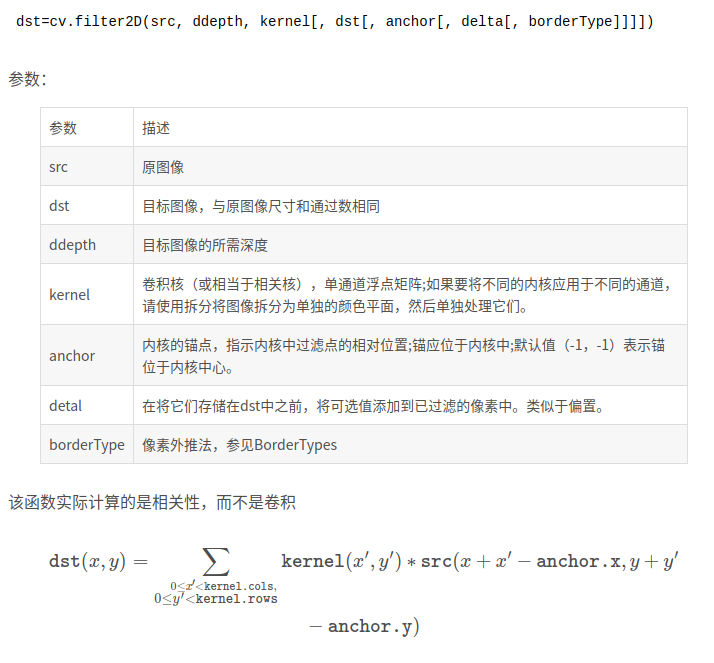

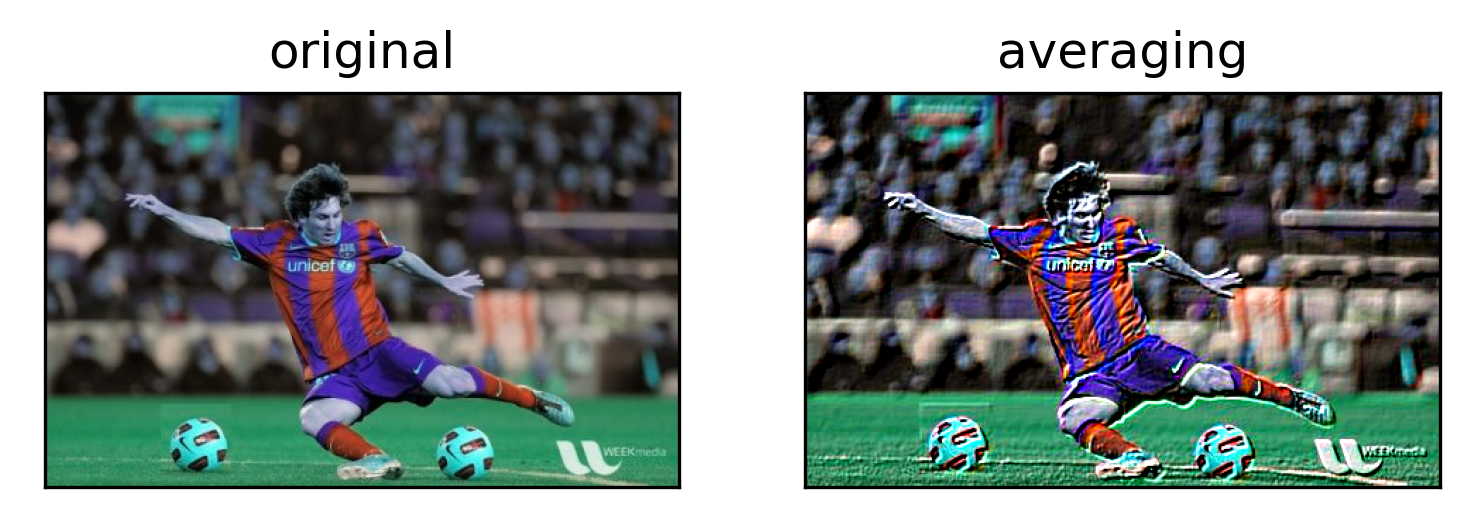

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

img = cv2.imread('messi0.jpg')

# blur
# kernel = np.ones((5,5),np.float32)/25
        # 5X5卷积核

# kernel = kernel=np.array( (  [0.0625,0.125 , 0.0625],
#        			    [0.125, 0.25, 0.125],
#                     [0.0625, 0.125, 0.0625]),dtype="float32")

#sobel
# kernel=np.array( (  [-1,-2,-1],
#        				 [0,0,0],
#       			     [1,2,1]),dtype="float32")

#浮雕
kernel=np.array( (  [-2,-1,0],
       				 [-1,1,1],
      			     [0,1,2]),dtype="float32")

#大纲
# kernel=np.array( (  [-1,-1,-1],
#        				 [-1,8,-1],
#       			     [-1,-1,-1]),dtype="float32")

#锐化
# kernel=np.array( (  [0,-1,0],
#        				 [-1,5,-1],
#       			     [0,-1,0]),dtype="float32")

#拉普拉斯算子（laplacian operator）
# kernel=np.array( (  [0,1,0],
#        				 [1,-4,1],
#       			     [0,1,0]),dtype="float32")


#cv.Filter2D(src, dst, kernel, anchor=(-1, -1))
#ddepth –desired depth of the destination image;
#if it is negative, it will be the same as src.depth();
#the following combinations of src.depth() and ddepth are supported:
#src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
#src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_64F, ddepth = -1/CV_64F
#when ddepth=-1, the output image will have the same depth as the source.

dst = cv2.filter2D(img,-1,kernel)
        # ddepth:目标图像深度，如果值为-1则表示目标图像输出为与原图像深度相同。
plt.subplot(121),plt.imshow(img),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('averaging')
plt.xticks([]),plt.yticks([])
plt.show()

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 平均 cv2.blur()和cv2.boxFilter()
这是由一个归一化卷积框完成的，他只是用卷积框覆盖区域所有像素的平均值来代替中心元素。
# 高斯模糊 cv2.GaussianBlur()
* 方框不变，将原来每个方框的值是相等的，现在里面的值是符合高斯分布的，方框中心的值最大，其余方框根据距离中心元素的距离递减，构成一个高斯小山包，原来的求平均数变成求加权平均数，权就是方框里的值。

* cv2.getGaussianKernel()，自己构建高斯核
# 中值模糊 cv2.medianBlur()
* 用与卷积框对应像素的中值来替代中心像素的值，这个滤波器经常用来去除椒盐噪声。前面的滤波器都是用计算得到的一个新值来取代中心像素的值，而中值滤波是用中心像素周围或者本身的值来取代他，他能有效去除噪声。卷积核大小是奇数
# 双边滤波 cv2.bilateralFilter()
* 非线性滤波中的一种。这是一种结合图像的空间邻近度与像素值相似度的处理办法。在滤波时，该滤波方法同时考虑空间临近信息与颜色相似信息，在滤除噪声、平滑图像的同时，又做到边缘保存。

* 双边滤波采用了两个高斯滤波的结合。一个负责计算空间邻近度的权值，也就是常用的高斯滤波器原理。而另一个负责计算像素值相似度的权值。在两个高斯滤波的同时作用下，就是双边滤波。



In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率


img = cv2.imread('face1.jpeg')

#平均
# blur = cv2.blur(img,(5,5))
#高斯模糊
# blur = cv2.GaussianBlur(img,(5,5),0)
        # 原图，高斯核（宽，高）奇数，沿xy轴上的标准差（0：根据核大小分别自动计算标准差）
# 中值模糊
# blur = cv2.medianBlur(img,5) 
        # 原图，取中值区域
#双边滤波
blur = cv2.bilateralFilter(img,9,75,70)  #表面纹理消失边缘保留
        # 原图，邻域直径，空间高斯函数标准差，灰度值相似性高斯函数标准差 
#滤波器尺寸越大图像越模糊；
# 高斯滤波：sigma越大图像越模糊，滤波器size越大图像越模糊
# 双边滤波:sigmar越大边缘越模糊，sigmad越大平坦区域越模糊


while(1):
    cv2.imshow('image',img)
    cv2.imshow('blur',blur)
    k=cv2.waitKey(1)
    if k == ord('q'):#按q键退出
        break
cv2.destroyAllWindows()

## 图片增加噪声 

In [3]:
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    '''
    添加椒盐噪声
    prob:噪声比例 
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 125
            elif rdn > thres:
                output[i][j] = 225
            else:
                output[i][j] = image[i][j]
    return output


def gasuss_noise(image, mean=0, var=0.001):
    ''' 
        添加高斯噪声
        mean : 均值 
        var : 方差
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    #cv.imshow("gasuss", out)
    return out


In [2]:
import cv2
import numpy as np

img = cv2.imread('j.png')
noise = sp_noise(img,0.03) #增加椒盐噪声
# nosie = gasuss_noise(img,0,0.01) #增加高斯噪声
image = img + noise

cv2.imshow('image',image)
cv2.waitKey(0)&0xFF
cv2.imwrite('j_sp_noise.jpg',image)
cv2.destroyAllWindows()

In [4]:
# -*- coding: utf-8 -*-
# Author: Xiaofeng Li
#
#.jpg image generate noise
#
 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image
 
 
class NoiseGenerator(object):
 
  def generated_noise(self, img):
    """
    Choose which noise to produce.
    :param img(.jpg):
    """
    noise_count = random.randint(1, 6)
    for i in range(noise_count):
      index_noise = random.randint(0, 5)
      if index_noise == 0:
        img = self.gaussian_img(img)
      elif index_noise == 1:
        img = self.salt_img(img)
      elif index_noise == 2:
        img = self.line_img(img)
      elif index_noise == 3:
        img = self.rotate_whole_img(img)
      elif index_noise == 4:
        img = self.erode_img(img)
      elif index_noise == 5:
        img = self.rotate_local_img(img)
    return img
 
  def gaussian_img(self, img):
    """
    gaussion noise
    """
    im = cv2.GaussianBlur(img, (9, 9), 5)
    return im
 
  def salt_img(self, img):
    """
       salt noise
       the number of sale dot is n
    """
    n = int(img.shape[0] * img.shape[1] * 0.1)
    ilist = np.random.randint(0, img.shape[1], n)
    jlist = np.random.randint(0, img.shape[0], n)
    for k in range(n):
      i = ilist[k]
      j = jlist[k]
      if img.ndim == 2:
        img[j, i] = 255
      elif img.ndim == 3:
        img[j:j+1, i:i+1,:] = 255
    return img
 
  def line_img(self, img):
    """
    drow 1 - 10 lines noise
    """
    num_line = np.random.randint(5, 10)
    for i in range(num_line):
      row = np.random.randint(0, img.shape[0], 2)
      col = np.random.randint(0, img.shape[1], 2)
      im = cv2.line(img, (row[0], col[0]),(row[1], col[1]), 0, 2)
    return im
 
  def rotate_whole_img(self, img):
    """
    rotate whole image
    rotate angle is 0 - 20
    """
    angle = np.random.randint(0, 20)
    h, w = img.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    im = cv2.warpAffine(img, M, (w, h), borderValue=(255, 255, 255))
    return im
 
  def rotate_local_img(self, img):
    """
    rotate local image
    rotate angle is 0 - 20
    """
    angle = np.random.randint(0, 20)
    random_dot1 = np.random.randint(200, 1400, 2)
    random_dot2 = np.random.randint(300, 2100, 2)
    dot1 = np.sort(random_dot1)
    dot2 = np.sort(random_dot2)
    crop_box = (dot1[0], dot2[0], dot1[1], dot2[1])
    img2 = Image.fromarray(img.astype('uint8')).convert('RGB')
 
    region = img2.crop(crop_box)
    center = ((dot1[1] - dot1[0]) // 2, (dot2[1] - dot2[0]) // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    region = cv2.warpAffine(np.array(region), M, (dot1[1] - dot1[0], dot2[1] - dot2[0]), borderValue=(255, 255, 255))
    im = Image.fromarray(region.astype('uint8')).convert('RGB')
    img2.paste(im, (dot1[0], dot2[0]))
    return np.array(img2)
 
  def erode_img(self, img):
    """
       erode noise
    """
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    im = cv2.erode(img, kernel)
    return im
 
 
 
if __name__ == '__main__':
  '''
  ng = NoiseGenerator()
  img = cv2.imread('img/0.jpg')
  im = ng.rotate_local_img(img)
  plt.imshow(im)
  plt.show()
  '''
 
  for i in range(10):
    target_path = os.getcwd()
    ng = NoiseGenerator()
    img = cv2.imread(os.path.join(target_path, 'img/{}.jpg'.format(i)))
    image = ng.generated_noise(img)
    
    path = os.path.join(target_path, 'noiseimage')
    if not os.path.exists(path):
      os.mkdir(path)
    
    cv2.imwrite(os.path.join(path, '{}.jpg'.format(i)), image)
    print("generated the %d noise image" % (i + 1))
 

AttributeError: 'NoneType' object has no attribute 'shape'